# Comprehension des données 

Le Single-Cell RNA-Seq (ou scRNA-seq) est une technique de séquençage de l'ARN qui permet de mesurer l'expression génique dans des cellules individuelles

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [16]:
from problem import get_train_data, get_test_data
X_train, y_train = get_train_data(
    path="/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers"
)

#X_train, y_train = get_train_data()
X_test, y_test = get_test_data(
    path="/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers"
)


In [17]:
lab_df = pd.DataFrame({'label': y_train})
lab_df.value_counts(normalize=True)

label       
T_cells_CD8+    0.342
T_cells_CD4+    0.336
Cancer_cells    0.237
NK_cells        0.085
Name: proportion, dtype: float64

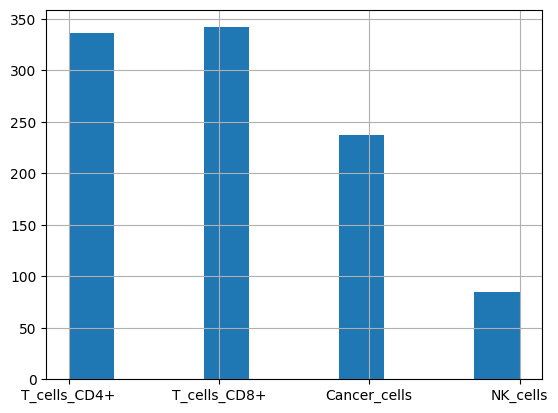

In [18]:
lab_df.label.hist();

Premier problème observé : le nombre de classes n’est pas le même, ce qui peut avoir un impact sur la création et les performances du modèle.

In [19]:
total_genes_counts = X_train.toarray().sum(axis=0)
total_cell_counts = X_train.toarray().sum(axis=1)

In [22]:
X_dense = X_train.toarray()

summary = pd.DataFrame({
    "min": [X_dense.min()],
    "max": [X_dense.max()],
    "mean": [X_dense.mean()],
    "median": [np.median(X_dense)],
    "std": [X_dense.std()],
    "sparsity": [(X_dense == 0).sum() / X_dense.size]
})
print(summary)


total_values = X_train.shape[0] * X_train.shape[1]  # nombre total de cases
num_nonzero = X_train.count_nonzero()                # nombre de valeurs non nulles
num_zeros = total_values - num_nonzero              # nombre de zéros
sparsity = num_zeros / total_values

print(f"Nombre total de zéros : {num_zeros:,}")
print(f"Proportion de zéros (sparsité) : {sparsity:.2%}")


   min     max     mean  median       std  sparsity
0  0.0  3260.0  0.24604     0.0  3.538571  0.919478
Nombre total de zéros : 12,459,844
Proportion de zéros (sparsité) : 91.95%


In [23]:
import numpy as np
import pandas as pd

# Conversion en matrice dense
X_dense = X_train.toarray()

# ==============================
# 1️⃣ Résumé des données brutes
# ==============================
summary = pd.DataFrame({
    "min": [X_dense.min()],
    "max": [X_dense.max()],
    "mean": [X_dense.mean()],
    "median": [np.median(X_dense)],
    "std": [X_dense.std()],
    "sparsity": [(X_dense == 0).sum() / X_dense.size]
})
print("Résumé des données brutes :")
print(summary)

# Sparsité globale
total_values = X_train.shape[0] * X_train.shape[1]
num_nonzero = X_train.count_nonzero()
num_zeros = total_values - num_nonzero
sparsity = num_zeros / total_values

print(f"Nombre total de zéros : {num_zeros:,}")
print(f"Proportion de zéros (sparsité) : {sparsity:.2%}")

# =====================================
# 2️⃣ Library Size Normalization (CORRIGÉE)
# =====================================
library_size = X_dense.sum(axis=1, keepdims=True)
library_size[library_size == 0] = 1

# Facteur standard scRNA-seq : 10 000
X_libnorm = (X_dense / library_size) * 1e4

# Log-normalisation (étape clé)
X_log = np.log1p(X_libnorm)

# =====================================
# 3️⃣ Résumé FINAL (sur X_log)
# =====================================
summary_log = pd.DataFrame({
    "min": [X_log.min()],
    "max": [X_log.max()],
    "mean": [X_log.mean()],
    "median": [np.median(X_log)],
    "std": [X_log.std()],
    "sparsity": [(X_log == 0).sum() / X_log.size]
})

print("\nRésumé après Library Size + log1p :")
print(summary_log)


Résumé des données brutes :
   min     max     mean  median       std  sparsity
0  0.0  3260.0  0.24604     0.0  3.538571  0.919478
Nombre total de zéros : 12,459,844
Proportion de zéros (sparsité) : 91.95%

Résumé après Library Size + log1p :
   min       max     mean  median       std  sparsity
0  0.0  8.753845  0.13638     0.0  0.532629  0.919478


In [24]:
import numpy as np
import pandas as pd

# Conversion en matrice dense
X_dense = X_train.toarray()

# ==============================
# 1️⃣ Résumé des données brutes
# ==============================
summary_raw = pd.DataFrame({
    "min": [X_dense.min()],
    "max": [X_dense.max()],
    "mean": [X_dense.mean()],
    "median": [np.median(X_dense)],
    "std": [X_dense.std()],
    "sparsity": [(X_dense == 0).sum() / X_dense.size]
})
print("Résumé des données brutes :")
print(summary_raw)

# =====================================
# 2️⃣ Library Size Normalization
# =====================================
library_size = X_dense.sum(axis=1, keepdims=True)
library_size[library_size == 0] = 1  # éviter division par zéro

# Facteur recommandé scRNA-seq : 10 000
X_libnorm = (X_dense / library_size) * 1e4

summary_lib = pd.DataFrame({
    "min": [X_libnorm.min()],
    "max": [X_libnorm.max()],
    "mean": [X_libnorm.mean()],
    "median": [np.median(X_libnorm)],
    "std": [X_libnorm.std()],
    "sparsity": [(X_libnorm == 0).sum() / X_libnorm.size]
})
print("\nRésumé après Library Size Normalization :")
print(summary_lib)

# =====================================
# 3️⃣ Option : log1p (facultatif)
# =====================================
X_log = np.log1p(X_libnorm)  # si tu veux garder les valeurs brutes, saute cette étape

# =====================================
# 4️⃣ Normalisation L1 par cellule (somme = 1)
# =====================================
# Choisis la version à utiliser : log ou pas
X_final = X_log  # ou X_libnorm si tu ne veux pas de log
X_sum1 = X_final / X_final.sum(axis=1, keepdims=True)

# Vérification
print("\nSomme par cellule (les 5 premières) :")
print(X_sum1.sum(axis=1)[:5])

# =====================================
# 5️⃣ Résumé final
# =====================================
summary_final = pd.DataFrame({
    "min": [X_sum1.min()],
    "max": [X_sum1.max()],
    "mean": [X_sum1.mean()],
    "median": [np.median(X_sum1)],
    "std": [X_sum1.std()],
    "sparsity": [(X_sum1 == 0).sum() / X_sum1.size]
})
print("\nRésumé final après L1 par cellule :")
print(summary_final)


Résumé des données brutes :
   min     max     mean  median       std  sparsity
0  0.0  3260.0  0.24604     0.0  3.538571  0.919478

Résumé après Library Size Normalization :
   min          max      mean  median       std  sparsity
0  0.0  6333.998535  0.737953     0.0  9.128844  0.919478

Somme par cellule (les 5 premières) :
[1.        0.9999999 1.        0.9999999 1.       ]

Résumé final après L1 par cellule :
   min       max      mean  median       std  sparsity
0  0.0  0.015987  0.000074     0.0  0.000339  0.919478


# Problème : le nombre de gènes

In [25]:
import numpy as np
import pandas as pd

# Conversion en matrice dense
X_dense = X_train.toarray()

# ==============================
# 1️⃣ Résumé des données brutes
# ==============================
summary = pd.DataFrame({
    "min": [X_dense.min()],
    "max": [X_dense.max()],
    "mean": [X_dense.mean()],
    "median": [np.median(X_dense)],
    "std": [X_dense.std()],
    "sparsity": [(X_dense == 0).sum() / X_dense.size]
})
print("Résumé des données brutes :")
print(summary)

# Sparsité globale
total_values = X_train.shape[0] * X_train.shape[1]
num_nonzero = X_train.count_nonzero()
num_zeros = total_values - num_nonzero
sparsity = num_zeros / total_values

print(f"Nombre total de zéros : {num_zeros:,}")
print(f"Proportion de zéros (sparsité) : {sparsity:.2%}")

# =====================================
# 2️⃣ Library Size Normalization (CORRIGÉE)
# =====================================
library_size = X_dense.sum(axis=1, keepdims=True)
library_size[library_size == 0] = 1

# Facteur standard scRNA-seq : 10 000
X_libnorm = (X_dense / library_size) * 1e4

# Log-normalisation (étape clé)
X_log = np.log1p(X_libnorm)

# =====================================
# 3️⃣ Résumé FINAL (sur X_log)
# =====================================
summary_log = pd.DataFrame({
    "min": [X_log.min()],
    "max": [X_log.max()],
    "mean": [X_log.mean()],
    "median": [np.median(X_log)],
    "std": [X_log.std()],
    "sparsity": [(X_log == 0).sum() / X_log.size]
})

print("\nRésumé après Library Size + log1p :")
print(summary_log)


Résumé des données brutes :
   min     max     mean  median       std  sparsity
0  0.0  3260.0  0.24604     0.0  3.538571  0.919478
Nombre total de zéros : 12,459,844
Proportion de zéros (sparsité) : 91.95%

Résumé après Library Size + log1p :
   min       max     mean  median       std  sparsity
0  0.0  8.753845  0.13638     0.0  0.532629  0.919478


In [26]:
num_colonnes = X_train.shape[1]
print("Nombre de colonnes :", num_colonnes)


Nombre de colonnes : 13551


In [27]:
import pandas as pd

# Conversion en dense
X_dense = X_train.toarray()

# Créer le DataFrame
df = pd.DataFrame(X_dense)

# Correction ici
df["label"] = y_train.to_numpy()  

# Séparer chaque classe
df_cancer = df[df['label'] == 'Cancer_cells'].drop(columns=['label'])
df_nk     = df[df['label'] == 'NK_cells'].drop(columns=['label'])
df_cd4    = df[df['label'] == 'T_cells_CD4+'].drop(columns=['label'])
df_cd8    = df[df['label'] == 'T_cells_CD8+'].drop(columns=['label'])

# Vérification
print("Cancer cells :", df_cancer.shape)
print("NK cells :", df_nk.shape)
print("T_cells_CD4+ :", df_cd4.shape)
print("T_cells_CD8+ :", df_cd8.shape)



Cancer cells : (237, 13551)
NK cells : (85, 13551)
T_cells_CD4+ : (336, 13551)
T_cells_CD8+ : (342, 13551)


In [28]:
import numpy as np
import pandas as pd

# df_cancer : DataFrame des cellules Cancer_cells

# Résumé statistique
summary = pd.DataFrame({
    "min": [df_cancer.min().min()],
    "max": [df_cancer.max().max()],
    "mean": [df_cancer.mean().mean()],
    "median": [np.median(df_cancer.values)],
    "std": [df_cancer.stack().std()],
    "sparsity": [(df_cancer == 0).sum().sum() / df_cancer.size]
})
print("Résumé statistique :")
print(summary)

# Nombre total de zéros
total_values = df_cancer.shape[0] * df_cancer.shape[1]
num_nonzero = (df_cancer.values != 0).sum()
num_zeros = total_values - num_nonzero
sparsity = num_zeros / total_values

print(f"Nombre total de zéros : {num_zeros:,}")
print(f"Proportion de zéros (sparsité) : {sparsity:.2%}")


Résumé statistique :
   min     max      mean  median       std  sparsity
0  0.0  3260.0  0.472413     0.0  6.245546  0.875973
Nombre total de zéros : 2,813,265
Proportion de zéros (sparsité) : 87.60%


6       559.0
7      7265.0
12    30548.0
13      525.0
14      546.0
dtype: float32


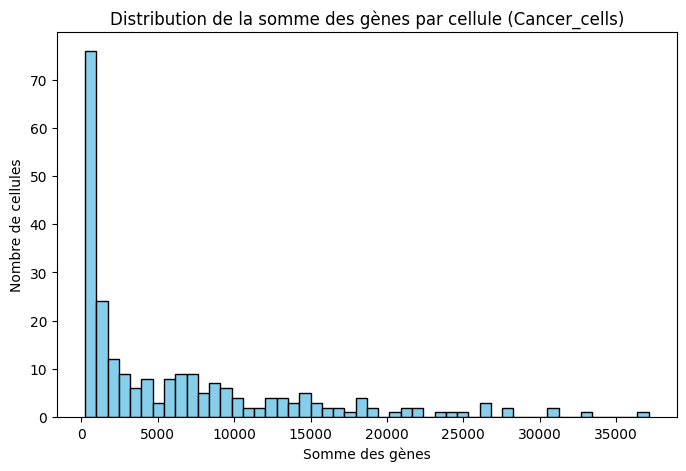

In [29]:
import matplotlib.pyplot as plt

# 1️⃣ Somme des gènes par cellule
gene_sums = df_cancer.sum(axis=1)  # axis=1 : somme sur les colonnes (gènes)

# Afficher les 5 premières valeurs
print(gene_sums.head())

# 2️⃣ Histogramme
plt.figure(figsize=(8,5))
plt.hist(gene_sums, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution de la somme des gènes par cellule (Cancer_cells)")
plt.xlabel("Somme des gènes")
plt.ylabel("Nombre de cellules")
plt.show()


Résumé des données brutes (Cancer_cells) :
   min     max      mean  median       std  sparsity
0  0.0  3260.0  0.472413     0.0  6.245545  0.875973
Nombre total de zéros : 2,813,265
Proportion de zéros (sparsité) : 87.60%


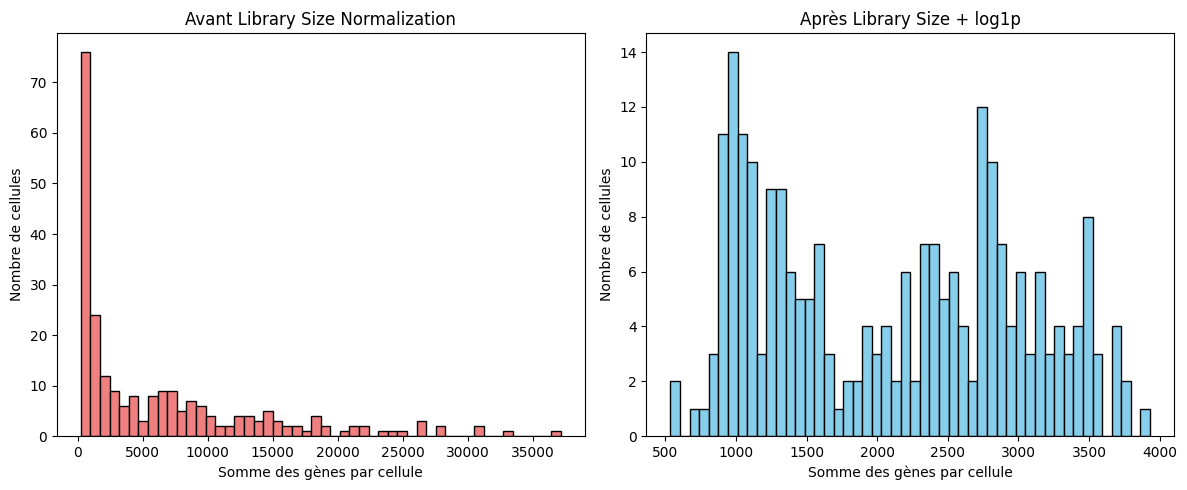


Résumé après Library Size + log1p (Cancer_cells) :
   min       max      mean  median       std  sparsity
0  0.0  8.753845  0.154945     0.0  0.522664  0.875973


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Préparer les données : Cancer_cells
# -----------------------------
X_dense = df_cancer.values.astype(float)  # convertir en float si nécessaire

# ==============================
# Résumé des données brutes
# ==============================
summary = pd.DataFrame({
    "min": [X_dense.min()],
    "max": [X_dense.max()],
    "mean": [X_dense.mean()],
    "median": [np.median(X_dense)],
    "std": [X_dense.std()],
    "sparsity": [(X_dense == 0).sum() / X_dense.size]
})
print("Résumé des données brutes (Cancer_cells) :")
print(summary)

# Sparsité globale
total_values = X_dense.shape[0] * X_dense.shape[1]
num_nonzero = np.count_nonzero(X_dense)
num_zeros = total_values - num_nonzero
sparsity = num_zeros / total_values

print(f"Nombre total de zéros : {num_zeros:,}")
print(f"Proportion de zéros (sparsité) : {sparsity:.2%}")

# ==============================
# Histogramme avant normalisation
# ==============================
sums_before = X_dense.sum(axis=1)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(sums_before, bins=50, color='lightcoral', edgecolor='black')
plt.title("Avant Library Size Normalization")
plt.xlabel("Somme des gènes par cellule")
plt.ylabel("Nombre de cellules")

# ==============================
# 2️⃣ Library Size Normalization
# ==============================
library_size = X_dense.sum(axis=1, keepdims=True)
library_size[library_size == 0] = 1  # éviter division par zéro

X_libnorm = (X_dense / library_size) * 1e4

# Log-normalisation
X_log = np.log1p(X_libnorm)

# ==============================
# Histogramme après normalisation
# ==============================
sums_after = X_log.sum(axis=1)
plt.subplot(1,2,2)
plt.hist(sums_after, bins=50, color='skyblue', edgecolor='black')
plt.title("Après Library Size + log1p")
plt.xlabel("Somme des gènes par cellule")
plt.ylabel("Nombre de cellules")

plt.tight_layout()
plt.show()

# ==============================
# 3️⃣ Résumé FINAL après normalisation
# ==============================
summary_log = pd.DataFrame({
    "min": [X_log.min()],
    "max": [X_log.max()],
    "mean": [X_log.mean()],
    "median": [np.median(X_log)],
    "std": [X_log.std()],
    "sparsity": [(X_log == 0).sum() / X_log.size]
})
print("\nRésumé après Library Size + log1p (Cancer_cells) :")
print(summary_log)


8     1946.0
21    3251.0
35     881.0
39    6636.0
85    1355.0
dtype: float32


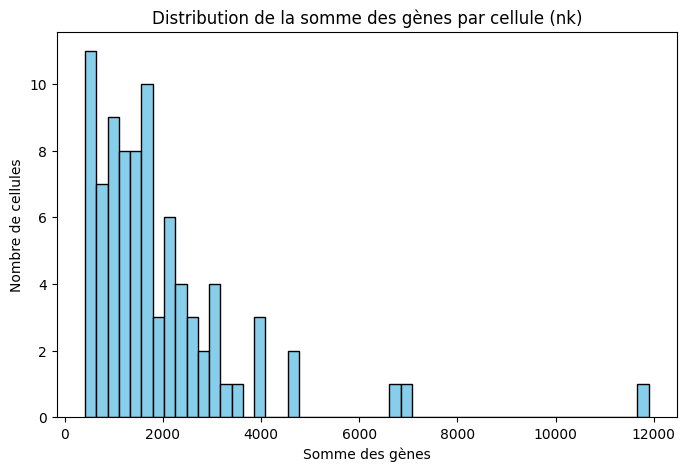

In [31]:
import matplotlib.pyplot as plt

# 1️⃣ Somme des gènes par cellule
gene_sums = df_nk.sum(axis=1)  # axis=1 : somme sur les colonnes (gènes)

# Afficher les 5 premières valeurs
print(gene_sums.head())

# 2️⃣ Histogramme
plt.figure(figsize=(8,5))
plt.hist(gene_sums, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution de la somme des gènes par cellule (nk)")
plt.xlabel("Somme des gènes")
plt.ylabel("Nombre de cellules")
plt.show()

Résumé des données brutes (NK_cells) :
   min    max      mean  median       std  sparsity
0  0.0  387.0  0.143083     0.0  1.593363  0.937521
Nombre total de zéros : 1,079,870
Proportion de zéros (sparsité) : 93.75%


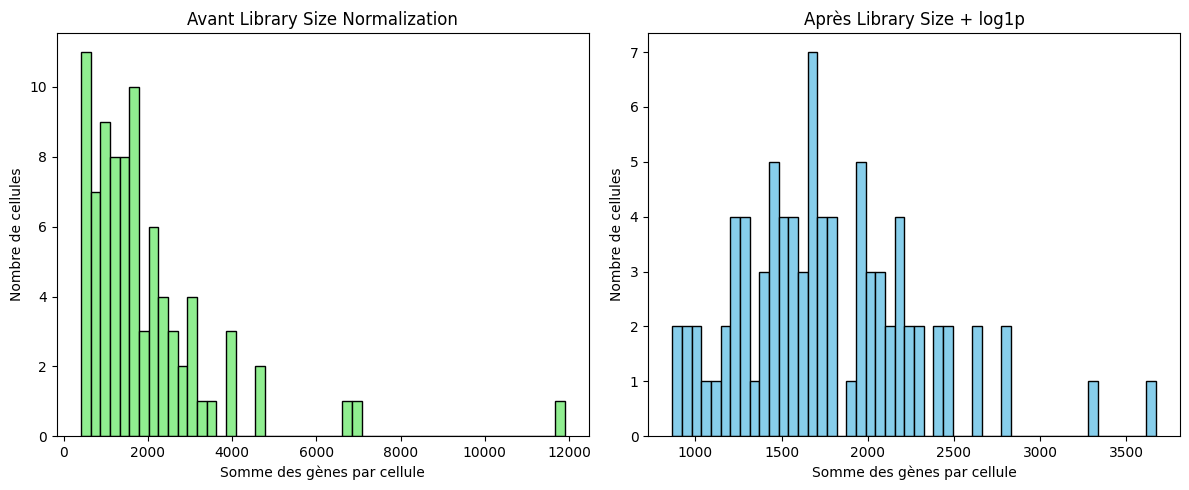


Résumé après Library Size + log1p (NK_cells) :
   min       max      mean  median       std  sparsity
0  0.0  7.492904  0.129816     0.0  0.544178  0.937521


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Préparer les données : NK_cells
# -----------------------------
X_dense = df_nk.values.astype(float)  # convertir en float si nécessaire

# ==============================
# Résumé des données brutes
# ==============================
summary = pd.DataFrame({
    "min": [X_dense.min()],
    "max": [X_dense.max()],
    "mean": [X_dense.mean()],
    "median": [np.median(X_dense)],
    "std": [X_dense.std()],
    "sparsity": [(X_dense == 0).sum() / X_dense.size]
})
print("Résumé des données brutes (NK_cells) :")
print(summary)

# Sparsité globale
total_values = X_dense.shape[0] * X_dense.shape[1]
num_nonzero = np.count_nonzero(X_dense)
num_zeros = total_values - num_nonzero
sparsity = num_zeros / total_values

print(f"Nombre total de zéros : {num_zeros:,}")
print(f"Proportion de zéros (sparsité) : {sparsity:.2%}")

# ==============================
# Histogramme avant normalisation
# ==============================
sums_before = X_dense.sum(axis=1)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(sums_before, bins=50, color='lightgreen', edgecolor='black')
plt.title("Avant Library Size Normalization")
plt.xlabel("Somme des gènes par cellule")
plt.ylabel("Nombre de cellules")

# ==============================
# 2️⃣ Library Size Normalization
# ==============================
library_size = X_dense.sum(axis=1, keepdims=True)
library_size[library_size == 0] = 1  # éviter division par zéro

X_libnorm = (X_dense / library_size) * 1e4

# Log-normalisation
X_log = np.log1p(X_libnorm)

# ==============================
# Histogramme après normalisation
# ==============================
sums_after = X_log.sum(axis=1)
plt.subplot(1,2,2)
plt.hist(sums_after, bins=50, color='skyblue', edgecolor='black')
plt.title("Après Library Size + log1p")
plt.xlabel("Somme des gènes par cellule")
plt.ylabel("Nombre de cellules")

plt.tight_layout()
plt.show()

# ==============================
# 3️⃣ Résumé FINAL après normalisation
# ==============================
summary_log = pd.DataFrame({
    "min": [X_log.min()],
    "max": [X_log.max()],
    "mean": [X_log.mean()],
    "median": [np.median(X_log)],
    "std": [X_log.std()],
    "sparsity": [(X_log == 0).sum() / X_log.size]
})
print("\nRésumé après Library Size + log1p (NK_cells) :")
print(summary_log)


0    14123.0
1     4867.0
2     1307.0
3      551.0
5     1952.0
dtype: float32


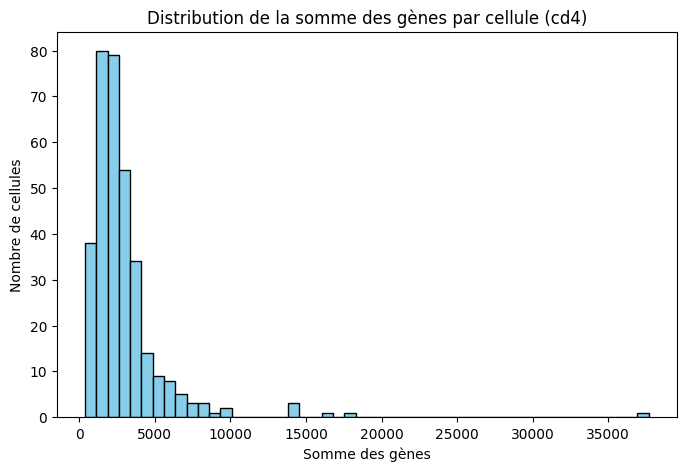

In [33]:
import matplotlib.pyplot as plt

# 1️⃣ Somme des gènes par cellule
gene_sums = df_cd4.sum(axis=1)  # axis=1 : somme sur les colonnes (gènes)

# Afficher les 5 premières valeurs
print(gene_sums.head())

# 2️⃣ Histogramme
plt.figure(figsize=(8,5))
plt.hist(gene_sums, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution de la somme des gènes par cellule (cd4)")
plt.xlabel("Somme des gènes")
plt.ylabel("Nombre de cellules")
plt.show()

Résumé des données brutes (T_cells_CD4+) :
   min    max      mean  median       std  sparsity
0  0.0  751.0  0.218655     0.0  2.532722  0.924209
Nombre total de zéros : 4,208,050
Proportion de zéros (sparsité) : 92.42%


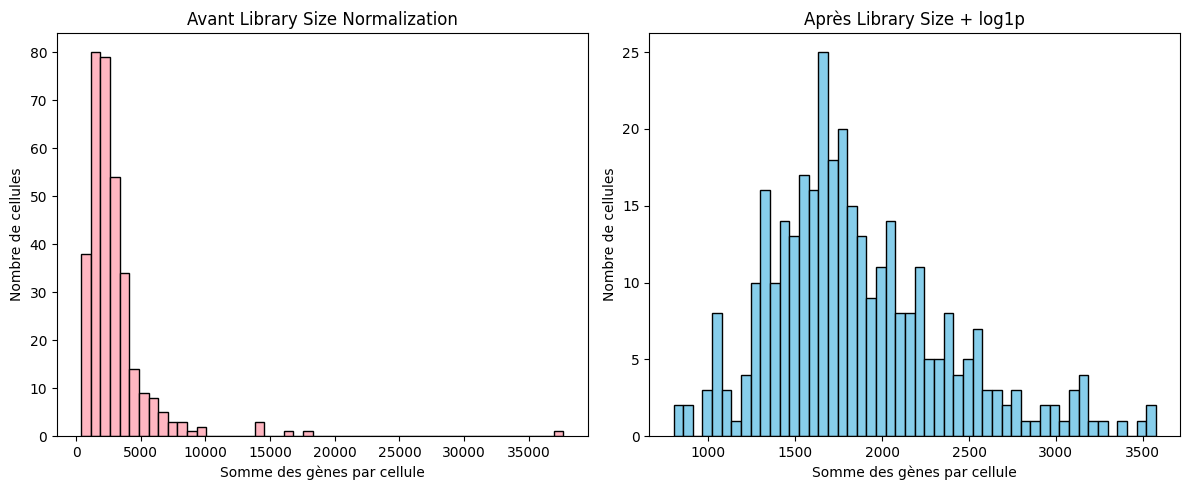


Résumé après Library Size + log1p (T_cells_CD4+) :
   min       max      mean  median       std  sparsity
0  0.0  8.194632  0.137087     0.0  0.533972  0.924209


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Préparer les données : T_cells_CD4+
# -----------------------------
X_dense = df_cd4.values.astype(float)  # convertir en float si nécessaire

# ==============================
# Résumé des données brutes
# ==============================
summary = pd.DataFrame({
    "min": [X_dense.min()],
    "max": [X_dense.max()],
    "mean": [X_dense.mean()],
    "median": [np.median(X_dense)],
    "std": [X_dense.std()],
    "sparsity": [(X_dense == 0).sum() / X_dense.size]
})
print("Résumé des données brutes (T_cells_CD4+) :")
print(summary)

# Sparsité globale
total_values = X_dense.shape[0] * X_dense.shape[1]
num_nonzero = np.count_nonzero(X_dense)
num_zeros = total_values - num_nonzero
sparsity = num_zeros / total_values

print(f"Nombre total de zéros : {num_zeros:,}")
print(f"Proportion de zéros (sparsité) : {sparsity:.2%}")

# ==============================
# Histogramme avant normalisation
# ==============================
sums_before = X_dense.sum(axis=1)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(sums_before, bins=50, color='lightpink', edgecolor='black')
plt.title("Avant Library Size Normalization")
plt.xlabel("Somme des gènes par cellule")
plt.ylabel("Nombre de cellules")

# ==============================
# 2️⃣ Library Size Normalization
# ==============================
library_size = X_dense.sum(axis=1, keepdims=True)
library_size[library_size == 0] = 1  # éviter division par zéro

X_libnorm = (X_dense / library_size) * 1e4

# Log-normalisation
X_log = np.log1p(X_libnorm)

# ==============================
# Histogramme après normalisation
# ==============================
sums_after = X_log.sum(axis=1)
plt.subplot(1,2,2)
plt.hist(sums_after, bins=50, color='skyblue', edgecolor='black')
plt.title("Après Library Size + log1p")
plt.xlabel("Somme des gènes par cellule")
plt.ylabel("Nombre de cellules")

plt.tight_layout()
plt.show()

# ==============================
# 3️⃣ Résumé FINAL après normalisation
# ==============================
summary_log = pd.DataFrame({
    "min": [X_log.min()],
    "max": [X_log.max()],
    "mean": [X_log.mean()],
    "median": [np.median(X_log)],
    "std": [X_log.std()],
    "sparsity": [(X_log == 0).sum() / X_log.size]
})
print("\nRésumé après Library Size + log1p (T_cells_CD4+) :")
print(summary_log)


4     1118.0
9     2947.0
22     328.0
24    2878.0
29    1314.0
dtype: float32


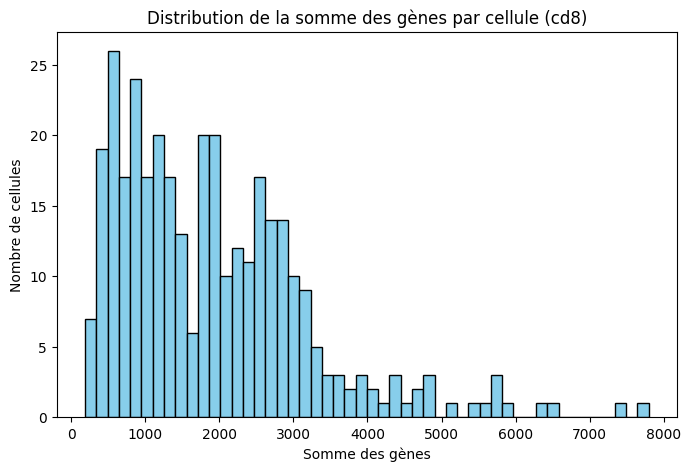

In [35]:
import matplotlib.pyplot as plt

# 1️⃣ Somme des gènes par cellule
gene_sums = df_cd8.sum(axis=1)  # axis=1 : somme sur les colonnes (gènes)

# Afficher les 5 premières valeurs
print(gene_sums.head())

# 2️⃣ Histogramme
plt.figure(figsize=(8,5))
plt.hist(gene_sums, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution de la somme des gènes par cellule (cd8)")
plt.xlabel("Somme des gènes")
plt.ylabel("Nombre de cellules")
plt.show()

Résumé des données brutes (T_cells_CD8+) :
   min    max     mean  median       std  sparsity
0  0.0  458.0  0.14166     0.0  1.612004  0.940493
Nombre total de zéros : 4,358,659
Proportion de zéros (sparsité) : 94.05%


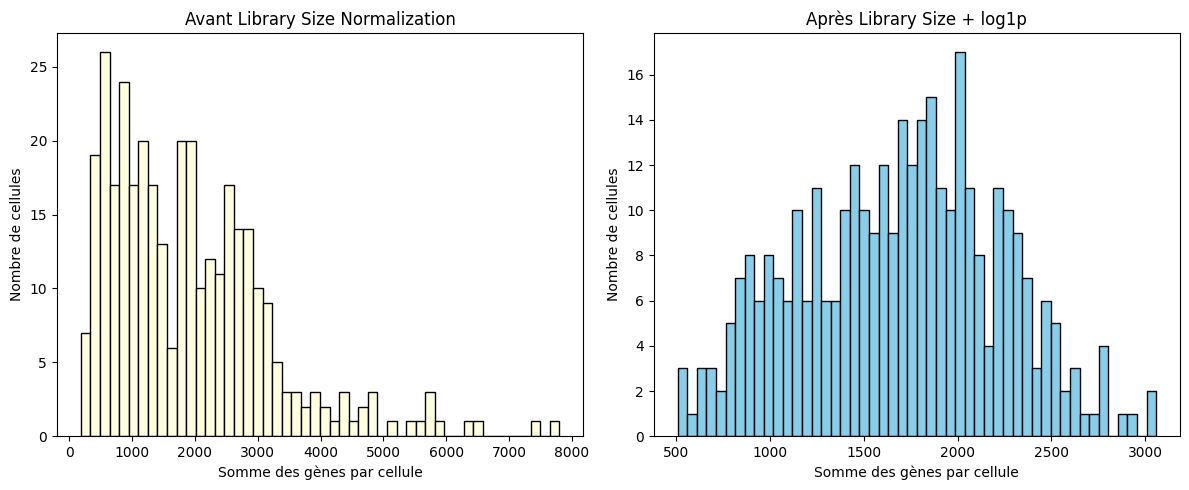


Résumé après Library Size + log1p (T_cells_CD8+) :
   min       max      mean  median       std  sparsity
0  0.0  8.042416  0.124453     0.0  0.534876  0.940493


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Préparer les données : T_cells_CD8+
# -----------------------------
X_dense = df_cd8.values.astype(float)  # convertir en float si nécessaire

# ==============================
# Résumé des données brutes
# ==============================
summary = pd.DataFrame({
    "min": [X_dense.min()],
    "max": [X_dense.max()],
    "mean": [X_dense.mean()],
    "median": [np.median(X_dense)],
    "std": [X_dense.std()],
    "sparsity": [(X_dense == 0).sum() / X_dense.size]
})
print("Résumé des données brutes (T_cells_CD8+) :")
print(summary)

# Sparsité globale
total_values = X_dense.shape[0] * X_dense.shape[1]
num_nonzero = np.count_nonzero(X_dense)
num_zeros = total_values - num_nonzero
sparsity = num_zeros / total_values

print(f"Nombre total de zéros : {num_zeros:,}")
print(f"Proportion de zéros (sparsité) : {sparsity:.2%}")

# ==============================
# Histogramme avant normalisation
# ==============================
sums_before = X_dense.sum(axis=1)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(sums_before, bins=50, color='lightyellow', edgecolor='black')
plt.title("Avant Library Size Normalization")
plt.xlabel("Somme des gènes par cellule")
plt.ylabel("Nombre de cellules")

# ==============================
# 2️⃣ Library Size Normalization
# ==============================
library_size = X_dense.sum(axis=1, keepdims=True)
library_size[library_size == 0] = 1  # éviter division par zéro

X_libnorm = (X_dense / library_size) * 1e4

# Log-normalisation
X_log = np.log1p(X_libnorm)

# ==============================
# Histogramme après normalisation
# ==============================
sums_after = X_log.sum(axis=1)
plt.subplot(1,2,2)
plt.hist(sums_after, bins=50, color='skyblue', edgecolor='black')
plt.title("Après Library Size + log1p")
plt.xlabel("Somme des gènes par cellule")
plt.ylabel("Nombre de cellules")

plt.tight_layout()
plt.show()

# ==============================
# 3️⃣ Résumé FINAL après normalisation
# ==============================
summary_log = pd.DataFrame({
    "min": [X_log.min()],
    "max": [X_log.max()],
    "mean": [X_log.mean()],
    "median": [np.median(X_log)],
    "std": [X_log.std()],
    "sparsity": [(X_log == 0).sum() / X_log.size]
})
print("\nRésumé après Library Size + log1p (T_cells_CD8+) :")
print(summary_log)


In [61]:
import pandas as pd
import numpy as np

# Supposons que les colonnes de df_* sont les gènes
gene_names = df_cancer.columns

def top_genes(df_class, top_n=500):
    """
    Renvoie les top_n gènes les plus exprimés en moyenne dans cette classe.
    """
    mean_per_gene = df_class.mean(axis=0)  # moyenne par gène
    top_genes = mean_per_gene.sort_values(ascending=False).head(top_n)
    return top_genes

# Top gènes pour chaque classe
top_cancer = top_genes(df_cancer)
top_nk     = top_genes(df_nk)
top_cd4    = top_genes(df_cd4)
top_cd8   = top_genes(df_cd8)

# Affichage
print("Top gènes Cancer_cells :")
print(top_cancer)


Top gènes Cancer_cells :
6340     155.485229
6981      91.924049
6982      75.860756
6983      61.721519
4256      57.860760
            ...    
4184       1.658228
647        1.654008
11553      1.654008
1151       1.645570
9977       1.641350
Length: 500, dtype: float32


In [38]:
print("\nTop gènes NK_cells :")
print(top_nk)


Top gènes NK_cells :
6340     88.705879
1017     38.352940
11841    28.317648
6981     17.905882
6983     16.694118
170      16.635294
6982     15.458823
5000     13.564706
9792     12.611765
3371     12.211764
9825     12.094118
9742     11.505882
6987     11.458823
6979     10.847059
9747      9.835294
6986      9.823529
4567      9.764706
9783      9.623529
1829      9.270588
4999      8.858824
dtype: float32


In [39]:
print("\nTop gènes T_cells_CD4+ :")
print(top_cd4)


Top gènes T_cells_CD4+ :
6340     131.872025
1017      50.443451
11841     45.303570
3371      31.562500
9825      29.735119
9792      29.505953
170       28.235119
9742      25.651785
6981      23.809525
9747      23.791666
9783      21.654762
9815      21.014881
9808      20.892857
6982      19.538691
9816      19.327381
9765      18.473215
9771      17.642857
9770      17.113094
11839     16.952381
9748      16.815475
dtype: float32


In [40]:
print("\nTop gènes T_cells_CD8+ :")
print(top_cd8)


Top gènes T_cells_CD8+ :
6340     89.646202
1017     37.865498
11841    33.470760
6981     17.991228
9825     17.467836
170      15.839181
9792     15.725146
9742     15.149123
3371     15.125731
6982     13.599415
5000     13.146199
9747     12.912281
6983     12.327485
9808     11.982456
9783     11.853801
9765     11.695907
9816     11.105263
9815     10.383041
9812      9.868421
9793      9.473684
dtype: float32


In [41]:
# Top gènes T_cells_CD4+ et T_cells_CD8+ (juste les indices/gènes)
top_cd4_genes = [6340, 1017, 11841, 3371, 9825, 9792, 170, 9742, 6981, 9747,
                 9783, 9815, 9808, 6982, 9816, 9765, 9771, 9770, 11839, 9748]

top_cd8_genes = [6340, 1017, 11841, 6981, 9825, 170, 9792, 9742, 3371, 6982,
                 5000, 9747, 6983, 9808, 9783, 9765, 9816, 9815, 9812, 9793]

# 🔹 Gènes similaires (présents dans les deux)
genes_similaires = list(set(top_cd4_genes).intersection(top_cd8_genes))

# 🔹 Gènes différents (présents seulement dans CD4 ou CD8)
genes_diff_cd4 = list(set(top_cd4_genes) - set(top_cd8_genes))
genes_diff_cd8 = list(set(top_cd8_genes) - set(top_cd4_genes))

print("Gènes similaires :")
print(sorted(genes_similaires))

print("\nGènes spécifiques à CD4+ :")
print(sorted(genes_diff_cd4))

print("\nGènes spécifiques à CD8+ :")
print(sorted(genes_diff_cd8))



Gènes similaires :
[170, 1017, 3371, 6340, 6981, 6982, 9742, 9747, 9765, 9783, 9792, 9808, 9815, 9816, 9825, 11841]

Gènes spécifiques à CD4+ :
[9748, 9770, 9771, 11839]

Gènes spécifiques à CD8+ :
[5000, 6983, 9793, 9812]


In [42]:
import pandas as pd
from collections import Counter

# -----------------------------
# 1️⃣ Sélection des gènes les plus exprimés (top 20)
# -----------------------------
top_cancer_filtered = top_cancer.sort_values(ascending=False).head(20)
top_nk_filtered = top_nk.sort_values(ascending=False).head(20)
top_cd4_filtered = top_cd4.sort_values(ascending=False).head(20)
top_cd8_filtered = top_cd8.sort_values(ascending=False).head(20)

# -----------------------------
# 2️⃣ Supprimer les gènes communs à plusieurs catégories
# -----------------------------
all_genes = [
    set(top_cancer_filtered.index),
    set(top_nk_filtered.index),
    set(top_cd4_filtered.index),
    set(top_cd8_filtered.index)
]

gene_counts = Counter([gene for genes in all_genes for gene in genes])

# Garder uniquement les gènes présents dans une seule catégorie
selected_genes_unique = [gene for gene, count in gene_counts.items() if count == 1]

# Filtrer chaque catégorie pour ne garder que les gènes uniques
top_cancer_unique = [g for g in top_cancer_filtered.index if g in selected_genes_unique]
top_nk_unique = [g for g in top_nk_filtered.index if g in selected_genes_unique]
top_cd4_unique = [g for g in top_cd4_filtered.index if g in selected_genes_unique]
top_cd8_unique = [g for g in top_cd8_filtered.index if g in selected_genes_unique]

# -----------------------------
# 3️⃣ Créer le nouveau DataFrame filtré
# -----------------------------
selected_genes_final = set(top_cancer_unique + top_nk_unique + top_cd4_unique + top_cd8_unique)
df_selected = pd.concat([df_cancer, df_nk, df_cd4, df_cd8])
df_selected = df_selected.loc[:, df_selected.columns.intersection(selected_genes_final)]

print(f"\nNombre total de gènes sélectionnés : {len(selected_genes_final)}")
print("\nDimensions du nouveau jeu de données filtré :")
print(df_selected.shape)



Nombre total de gènes sélectionnés : 15

Dimensions du nouveau jeu de données filtré :
(1000, 15)


In [43]:
import pandas as pd

# -----------------------------
# Sélection des 20 gènes les plus exprimés
# -----------------------------
top_cancer_filtered = top_cancer.sort_values(ascending=False).head(50)
top_nk_filtered = top_nk.sort_values(ascending=False).head(50)
top_cd4_filtered = top_cd4.sort_values(ascending=False).head(50)
top_cd8_filtered = top_cd8.sort_values(ascending=False).head(50)

# -----------------------------
# Créer un DataFrame pour afficher les gènes
# -----------------------------
# Créer une table avec des cellules vides si un gène n'est pas dans une catégorie
genes_all = list(set(top_cancer_filtered.index).union(top_nk_filtered.index, top_cd4_filtered.index, top_cd8_filtered.index))

# Créer un DataFrame avec 1 si le gène est présent dans une catégorie, sinon 0
data = {
    'Cancer_cells': [1 if gene in top_cancer_filtered.index else 0 for gene in genes_all],
    'NK_cells': [1 if gene in top_nk_filtered.index else 0 for gene in genes_all],
    'T_cells_CD4+': [1 if gene in top_cd4_filtered.index else 0 for gene in genes_all],
    'T_cells_CD8+': [1 if gene in top_cd8_filtered.index else 0 for gene in genes_all]
}

# Créer le DataFrame
df_genes = pd.DataFrame(data, index=genes_all)

# Afficher la liste des gènes pour chaque catégorie
df_genes


,Cancer_cells,NK_cells,T_cells_CD4+,T_cells_CD8+
4352,1,0,0,0
9792,1,1,1,1
11841,0,1,1,1
6979,1,1,0,0
6340,1,1,1,1
6981,1,1,1,1
6982,1,1,1,1
6983,1,1,0,1
5000,0,1,0,1
4999,0,1,0,0


In [44]:
import pandas as pd

# -----------------------------
# Sélection des 100 gènes les plus exprimés
# -----------------------------
top_cancer_filtered = top_cancer.sort_values(ascending=False).head(200)
top_nk_filtered = top_nk.sort_values(ascending=False).head(200)
top_cd4_filtered = top_cd4.sort_values(ascending=False).head(200)
top_cd8_filtered = top_cd8.sort_values(ascending=False).head(200)

# -----------------------------
# Créer un DataFrame pour afficher les gènes
# -----------------------------
# Créer une table avec des cellules vides si un gène n'est pas dans une catégorie
genes_all = list(set(top_cancer_filtered.index).union(top_nk_filtered.index, top_cd4_filtered.index, top_cd8_filtered.index))

# Créer un DataFrame avec 1 si le gène est présent dans une catégorie, sinon 0
data = {
    'Cancer_cells': [1 if gene in top_cancer_filtered.index else 0 for gene in genes_all],
    'NK_cells': [1 if gene in top_nk_filtered.index else 0 for gene in genes_all],
    'T_cells_CD4+': [1 if gene in top_cd4_filtered.index else 0 for gene in genes_all],
    'T_cells_CD8+': [1 if gene in top_cd8_filtered.index else 0 for gene in genes_all]
}

# Créer le DataFrame
df_genes = pd.DataFrame(data, index=genes_all)

# Ajouter une colonne 'Total' qui est la somme des lignes
df_genes['Total'] = df_genes.sum(axis=1)

# Afficher le DataFrame
df_genes



,Cancer_cells,NK_cells,T_cells_CD4+,T_cells_CD8+,Total
4352,1,0,0,0,1
9792,1,1,1,1,4
11841,0,1,1,1,3
6979,1,1,0,0,2
6340,1,1,1,1,4
6981,1,1,1,1,4
6982,1,1,1,1,4
6983,1,1,0,1,3
5000,0,1,0,1,2
4999,0,1,0,0,1


In [45]:
import pandas as pd

# -----------------------------
# Sélection des 200 gènes les plus exprimés
# -----------------------------
top_cancer_filtered = top_cancer.sort_values(ascending=False).head(200)
top_nk_filtered = top_nk.sort_values(ascending=False).head(200)
top_cd4_filtered = top_cd4.sort_values(ascending=False).head(200)
top_cd8_filtered = top_cd8.sort_values(ascending=False).head(200)

# -----------------------------
# Créer un DataFrame pour afficher les gènes
# -----------------------------
# Créer une table avec des cellules vides si un gène n'est pas dans une catégorie
genes_all = list(set(top_cancer_filtered.index).union(top_nk_filtered.index, top_cd4_filtered.index, top_cd8_filtered.index))

# Créer un DataFrame avec 1 si le gène est présent dans une catégorie, sinon 0
data = {
    'Cancer_cells': [1 if gene in top_cancer_filtered.index else 0 for gene in genes_all],
    'NK_cells': [1 if gene in top_nk_filtered.index else 0 for gene in genes_all],
    'T_cells_CD4+': [1 if gene in top_cd4_filtered.index else 0 for gene in genes_all],
    'T_cells_CD8+': [1 if gene in top_cd8_filtered.index else 0 for gene in genes_all]
}

# Créer le DataFrame
df_genes = pd.DataFrame(data, index=genes_all)

# -----------------------------
# Ajouter la colonne 'Total' qui somme les lignes
# -----------------------------
df_genes['Total'] = df_genes.sum(axis=1)

# -----------------------------
# Extraire les gènes dont la colonne 'Total' est égale à 1
# -----------------------------
genes_total_1 = df_genes[df_genes['Total'] == 1].index.tolist()

# Afficher la liste des gènes avec total = 1
print("Liste des gènes dont le total est égal à 1 :")
print(genes_total_1)


Liste des gènes dont le total est égal à 1 :
[4352, 4999, 6986, 9748, 9941, 9812, 4567, 4256, 4257, 1829, 9768, 9771, 9770, 9793, 9789]


In [46]:
# Gènes ayant un total de 1
genes_total_1 = [9779, 9814, 2152, 8568, 635, 636, 1937, 5015, 7331, 10177, 
                 4801, 10955, 9935, 9940, 9941, 4567, 2779, 2528, 9763, 12286]

# Vérifier que les indices des gènes sont valides dans X_train
valid_genes = [gene for gene in genes_total_1 if gene < X_train.shape[1]]  # Assurez-vous que les indices sont dans la plage de colonnes de X_train

# Si tous les gènes sont valides, vous pouvez sélectionner ces colonnes
X_train_selected = X_train[:, valid_genes]  # Sélectionner les colonnes correspondant aux indices valides

# Si X_train est une matrice sparse, convertissez-la en DataFrame pour une meilleure lisibilité
import pandas as pd
X_train_selected_df = pd.DataFrame(X_train_selected.toarray())  # Conversion en DataFrame pour une meilleure compréhension

# Vérifiez les dimensions de X_train_selected
print(f"Dimensions de X_train_selected : {X_train_selected_df.shape}")


Dimensions de X_train_selected : (1000, 20)


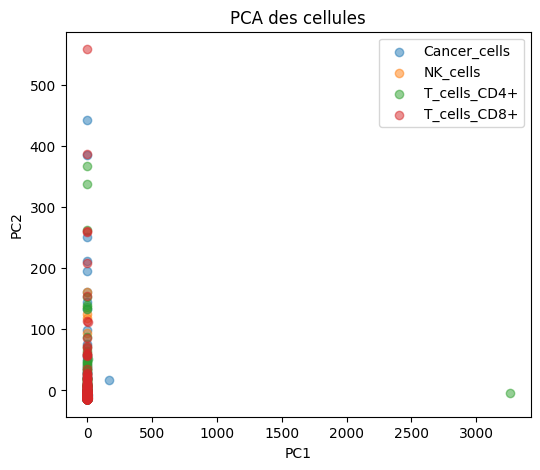

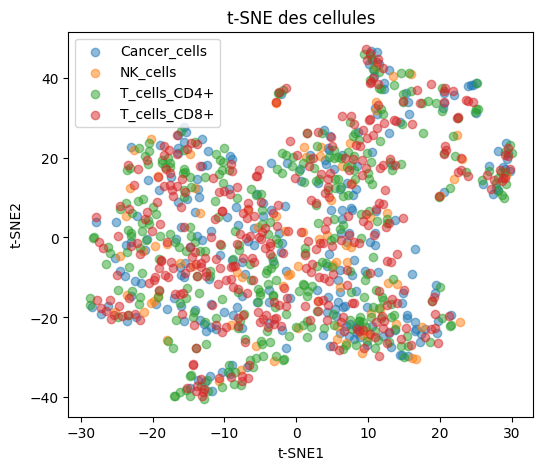

/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


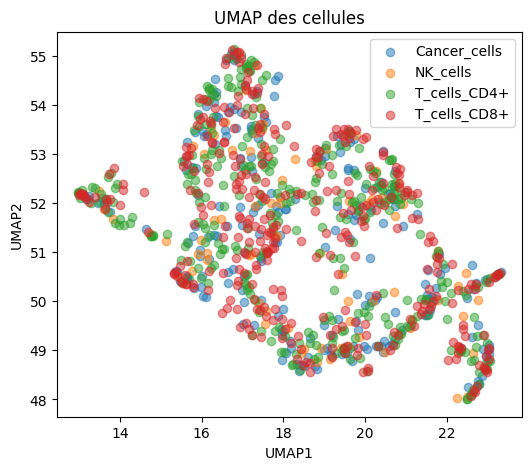

In [47]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import numpy as np

# -----------------------------
# 1️⃣ Préparer les données
# -----------------------------
X = X_train_selected_df.astype(float)

# Labels pour colorer les points
labels = (
    ['Cancer_cells'] * df_cancer.shape[0] +
    ['NK_cells'] * df_nk.shape[0] +
    ['T_cells_CD4+'] * df_cd4.shape[0] +
    ['T_cells_CD8+'] * df_cd8.shape[0]
)
labels = np.array(labels)

# Couleurs pour chaque classe
colors = {'Cancer_cells':'red', 'NK_cells':'green', 'T_cells_CD4+':'blue', 'T_cells_CD8+':'orange'}

# -----------------------------
# 2️⃣ PCA
# -----------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6,5))
for cls in np.unique(labels):
    idx = labels == cls
    plt.scatter(X_pca[idx,0], X_pca[idx,1], label=cls, alpha=0.5)
plt.title("PCA des cellules")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

# -----------------------------
# 3️⃣ t-SNE
# -----------------------------
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(6,5))
for cls in np.unique(labels):
    idx = labels == cls
    plt.scatter(X_tsne[idx,0], X_tsne[idx,1], label=cls, alpha=0.5)
plt.title("t-SNE des cellules")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.legend()
plt.show()

# -----------------------------
# 4️⃣ UMAP
# -----------------------------
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)

plt.figure(figsize=(6,5))
for cls in np.unique(labels):
    idx = labels == cls
    plt.scatter(X_umap[idx,0], X_umap[idx,1], label=cls, alpha=0.5)
plt.title("UMAP des cellules")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend()
plt.show()


# New 

In [ ]:
type(X_train)

scipy.sparse._csr.csr_matrix

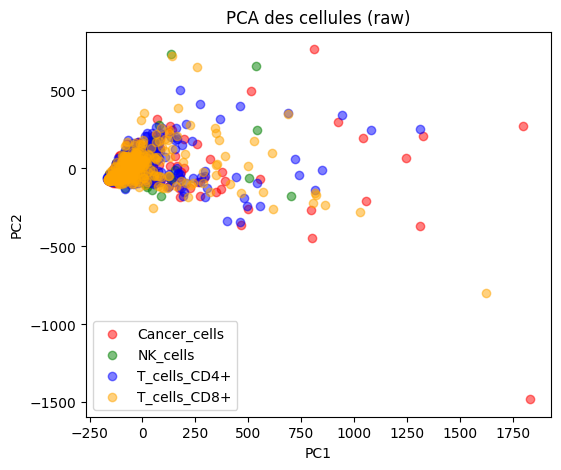

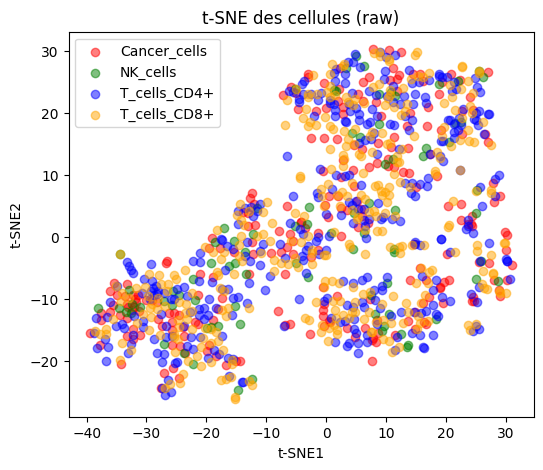

/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


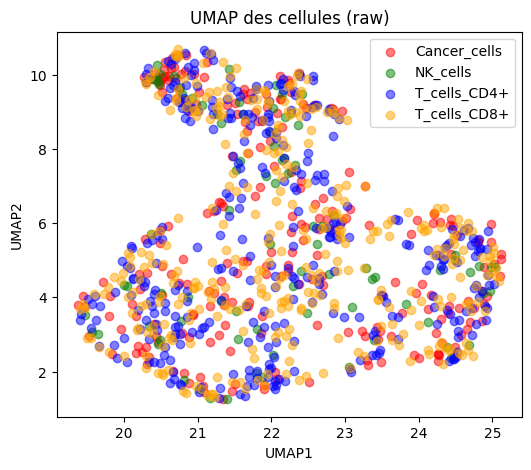

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from scipy.sparse import vstack

# -----------------------------
# 1️⃣ Convertir X_train en dense
# -----------------------------
X_dense = X_train.toarray()  # si la matrice est trop grosse, utiliser X_train directement

# -----------------------------
# 2️⃣ Créer les labels
# -----------------------------
labels = np.array(
    ['Cancer_cells'] * df_cancer.shape[0] +
    ['NK_cells'] * df_nk.shape[0] +
    ['T_cells_CD4+'] * df_cd4.shape[0] +
    ['T_cells_CD8+'] * df_cd8.shape[0]
)

# Vérification
assert X_dense.shape[0] == len(labels), "Nombre de labels != nombre de cellules"

colors = {'Cancer_cells':'red', 'NK_cells':'green', 'T_cells_CD4+':'blue', 'T_cells_CD8+':'orange'}

# -----------------------------
# 3️⃣ PCA
# -----------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_dense)

plt.figure(figsize=(6,5))
for cls in np.unique(labels):
    idx = labels == cls
    plt.scatter(X_pca[idx,0], X_pca[idx,1], label=cls, color=colors[cls], alpha=0.5)
plt.title("PCA des cellules (raw)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

# -----------------------------
# 4️⃣ t-SNE
# -----------------------------
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_dense)

plt.figure(figsize=(6,5))
for cls in np.unique(labels):
    idx = labels == cls
    plt.scatter(X_tsne[idx,0], X_tsne[idx,1], label=cls, color=colors[cls], alpha=0.5)
plt.title("t-SNE des cellules (raw)")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.legend()
plt.show()

# -----------------------------
# 5️⃣ UMAP
# -----------------------------
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_dense)

plt.figure(figsize=(6,5))
for cls in np.unique(labels):
    idx = labels == cls
    plt.scatter(X_umap[idx,0], X_umap[idx,1], label=cls, color=colors[cls], alpha=0.5)
plt.title("UMAP des cellules (raw)")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend()
plt.show()


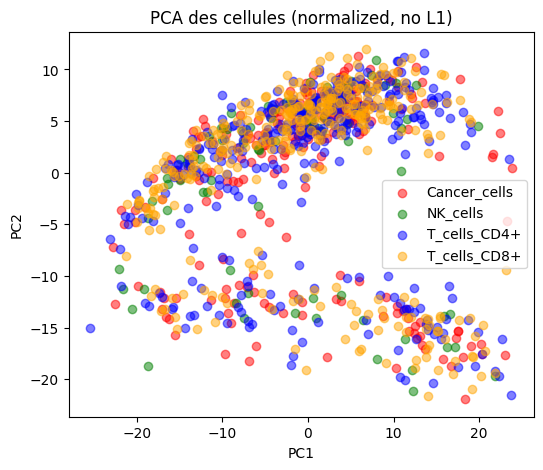

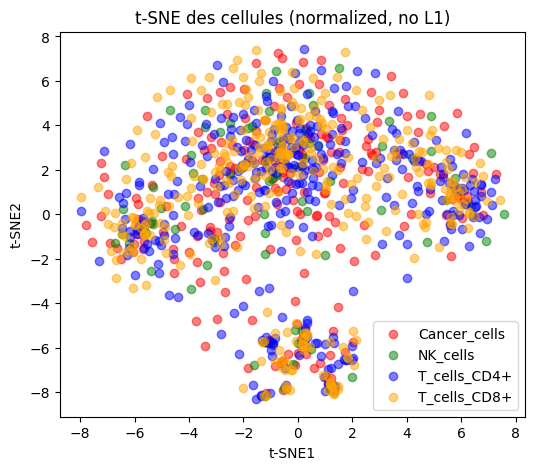

/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


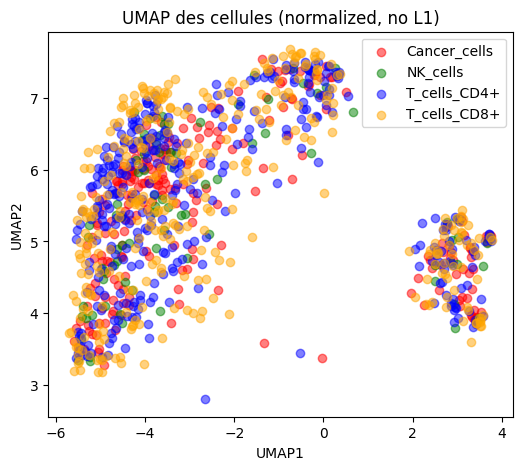

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# -----------------------------
# 1️⃣ Convertir X_train en dense
# -----------------------------
X_dense = X_train.toarray()

# -----------------------------
# 2️⃣ Library-size normalization (CP10k)
# -----------------------------
library_size = X_dense.sum(axis=1, keepdims=True)
library_size[library_size == 0] = 1  # éviter division par zéro

X_libnorm = (X_dense / library_size) * 1e4

# -----------------------------
# 3️⃣ log1p (optionnel)
# -----------------------------
X_log = np.log1p(X_libnorm)  # ou X_libnorm si tu veux garder les valeurs brutes

# -----------------------------
# 4️⃣ Pas de L1
# -----------------------------
X_final = X_log  # c'est cette matrice qu'on utilise pour PCA/UMAP

# -----------------------------
# 5️⃣ Créer les labels
# -----------------------------
labels = np.array(
    ['Cancer_cells'] * df_cancer.shape[0] +
    ['NK_cells'] * df_nk.shape[0] +
    ['T_cells_CD4+'] * df_cd4.shape[0] +
    ['T_cells_CD8+'] * df_cd8.shape[0]
)

assert X_final.shape[0] == len(labels), "Nombre de labels != nombre de cellules"

colors = {'Cancer_cells':'red', 'NK_cells':'green', 'T_cells_CD4+':'blue', 'T_cells_CD8+':'orange'}

# -----------------------------
# 6️⃣ PCA
# -----------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_final)

plt.figure(figsize=(6,5))
for cls in np.unique(labels):
    idx = labels == cls
    plt.scatter(X_pca[idx,0], X_pca[idx,1], label=cls, color=colors[cls], alpha=0.5)
plt.title("PCA des cellules (normalized, no L1)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

# -----------------------------
# 7️⃣ t-SNE
# -----------------------------
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_final)

plt.figure(figsize=(6,5))
for cls in np.unique(labels):
    idx = labels == cls
    plt.scatter(X_tsne[idx,0], X_tsne[idx,1], label=cls, color=colors[cls], alpha=0.5)
plt.title("t-SNE des cellules (normalized, no L1)")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.legend()
plt.show()

# -----------------------------
# 8️⃣ UMAP
# -----------------------------
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_final)

plt.figure(figsize=(6,5))
for cls in np.unique(labels):
    idx = labels == cls
    plt.scatter(X_umap[idx,0], X_umap[idx,1], label=cls, color=colors[cls], alpha=0.5)
plt.title("UMAP des cellules (normalized, no L1)")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend()
plt.show()


Nombre de gènes avant filtrage : 13551
Nombre de gènes après filtrage : 4243


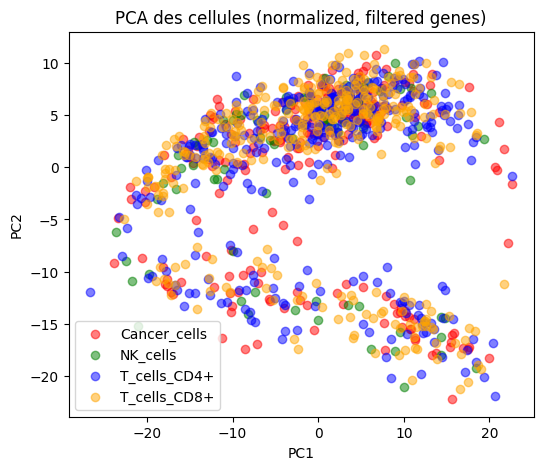

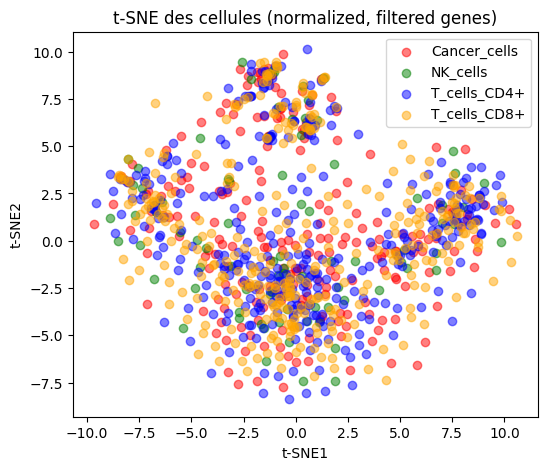

/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


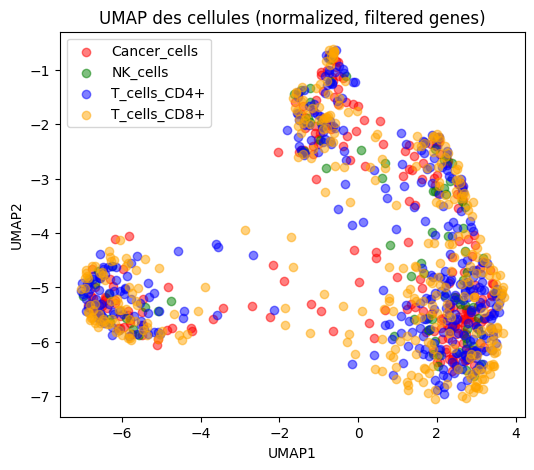

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# -----------------------------
# 1️⃣ Convertir X_train en dense
# -----------------------------
X_dense = X_train.toarray()

# -----------------------------
# 2️⃣ Library-size normalization (CP10k)
# -----------------------------
library_size = X_dense.sum(axis=1, keepdims=True)
library_size[library_size == 0] = 1  # éviter division par zéro

X_libnorm = (X_dense / library_size) * 1e4

# -----------------------------
# 3️⃣ log1p (optionnel)
# -----------------------------
X_log = np.log1p(X_libnorm)  # ou X_libnorm si pas de log

# -----------------------------
# 4️⃣ Suppression des gènes peu exprimés (moyenne < 0.1)
# -----------------------------
gene_mean = X_log.mean(axis=0)
mask = gene_mean >= 0.1
X_filtered = X_log[:, mask]

print(f"Nombre de gènes avant filtrage : {X_log.shape[1]}")
print(f"Nombre de gènes après filtrage : {X_filtered.shape[1]}")

# -----------------------------
# 5️⃣ Créer les labels
# -----------------------------
labels = np.array(
    ['Cancer_cells'] * df_cancer.shape[0] +
    ['NK_cells'] * df_nk.shape[0] +
    ['T_cells_CD4+'] * df_cd4.shape[0] +
    ['T_cells_CD8+'] * df_cd8.shape[0]
)

assert X_filtered.shape[0] == len(labels), "Nombre de labels != nombre de cellules"

colors = {'Cancer_cells':'red', 'NK_cells':'green', 'T_cells_CD4+':'blue', 'T_cells_CD8+':'orange'}

# -----------------------------
# 6️⃣ PCA
# -----------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_filtered)

plt.figure(figsize=(6,5))
for cls in np.unique(labels):
    idx = labels == cls
    plt.scatter(X_pca[idx,0], X_pca[idx,1], label=cls, color=colors[cls], alpha=0.5)
plt.title("PCA des cellules (normalized, filtered genes)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

# -----------------------------
# 7️⃣ t-SNE
# -----------------------------
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_filtered)

plt.figure(figsize=(6,5))
for cls in np.unique(labels):
    idx = labels == cls
    plt.scatter(X_tsne[idx,0], X_tsne[idx,1], label=cls, color=colors[cls], alpha=0.5)
plt.title("t-SNE des cellules (normalized, filtered genes)")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.legend()
plt.show()

# -----------------------------
# 8️⃣ UMAP
# -----------------------------
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_filtered)

plt.figure(figsize=(6,5))
for cls in np.unique(labels):
    idx = labels == cls
    plt.scatter(X_umap[idx,0], X_umap[idx,1], label=cls, color=colors[cls], alpha=0.5)
plt.title("UMAP des cellules (normalized, filtered genes)")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend()
plt.show()


In [ ]:
import numpy as np

moyenne = np.mean(X_log, axis=0)
mediane = np.median(X_log, axis=0)

import pandas as pd

stats = pd.DataFrame({
    "moyenne": moyenne,
    "mediane": mediane
})

mask = moyenne >= 0.1

X_filtered = X_dense[:, mask]
stats_filtered = stats[mask]

print("Avant :", X_dense.shape)
print("Après :", X_filtered.shape)

print(stats_filtered.head())

from scipy.sparse import csr_matrix

X_filtered_sparse = csr_matrix(X_filtered)



Avant : (342, 13551)
Après : (342, 3736)
     moyenne  mediane
0   0.118260      0.0
9   0.417270      0.0
11  0.168356      0.0
17  0.102743      0.0
19  0.157085      0.0


In [62]:
import pandas as pd
import numpy as np

# -----------------------------
# Exemple : top 100 gènes par classe (à partir de tes séries top_XXX)
# -----------------------------
# Ici tu prends 100 gènes par classe
top_cancer_filtered = top_cancer.sort_values(ascending=False).head(500)
top_nk_filtered = top_nk.sort_values(ascending=False).head(500)
top_cd4_filtered = top_cd4.sort_values(ascending=False).head(500)
top_cd8_filtered = top_cd8.sort_values(ascending=False).head(500)

# -----------------------------
# Liste de tous les gènes sélectionnés
# -----------------------------
genes_all = list(set(
    top_cancer_filtered.index
    ).union(top_nk_filtered.index,
            top_cd4_filtered.index,
            top_cd8_filtered.index))

# -----------------------------
# Construire un DataFrame vide avec ces gènes
# -----------------------------
df_genes = pd.DataFrame(index=genes_all)

# Ajouter les colonnes pour chaque classe
df_genes['Cancer_cells'] = df_genes.index.map(lambda g: top_cancer_filtered.get(g, 0))
df_genes['NK_cells'] = df_genes.index.map(lambda g: top_nk_filtered.get(g, 0))
df_genes['T_cells_CD4+'] = df_genes.index.map(lambda g: top_cd4_filtered.get(g, 0))
df_genes['T_cells_CD8+'] = df_genes.index.map(lambda g: top_cd8_filtered.get(g, 0))

# -----------------------------
# Colonne 'Total' = somme des colonnes
# -----------------------------
df_genes['Total'] = df_genes[['Cancer_cells','NK_cells','T_cells_CD4+','T_cells_CD8+']].sum(axis=1)

# -----------------------------
# Affichage
# -----------------------------
df_genes = df_genes.sort_values('Total', ascending=False)
print(df_genes.head(20))


       Cancer_cells   NK_cells  T_cells_CD4+  T_cells_CD8+       Total
6340     155.485229  88.705879    131.872025     89.646202  465.709335
6981      91.924049  17.905882     23.809525     17.991228  151.630684
1017      20.320675  38.352940     50.443451     37.865498  146.982563
11841     21.413502  28.317648     45.303570     33.470760  128.505480
6982      75.860756  15.458823     19.538691     13.599415  124.457685
9792      55.489452  12.611765     29.505953     15.725146  113.332316
6983      61.721519  16.694118     15.303572     12.327485  106.046695
3371      40.894516  12.211764     31.562500     15.125731   99.794512
9825      39.628693  12.094118     29.735119     17.467836   98.925766
9742      43.059071  11.505882     25.651785     15.149123   95.365861
9783      44.995781   9.623529     21.654762     11.853801   88.127873
9747      40.919830   9.835294     23.791666     12.912281   87.459071
9815      43.632912   8.129412     21.014881     10.383041   83.160246
170   